# EDA + ML + Outliers

## EDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore')

### read data

In [2]:
df = pd.read_csv('adult.csv',na_values='?') # reading csv format data and directly finding the missing values using na_values
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
df.info() # here you can observe that here 3 columns having null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.isnull().sum() # spot the null values column

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [12]:
((df.isnull().sum() / len(df)) * 100).round(2) # checking the percentage of null values

age                0.00
workclass          5.73
fnlwgt             0.00
education          0.00
educational-num    0.00
marital-status     0.00
occupation         5.75
relationship       0.00
race               0.00
gender             0.00
capital-gain       0.00
capital-loss       0.00
hours-per-week     0.00
native-country     1.75
income             0.00
dtype: float64

In [13]:
miss_value_percentage = ((df.isnull().sum() / len(df)) * 100).sum() # this line gives the sum of total percentage of missing values
print(f'missing_values_percentage:{miss_value_percentage:.2f}%')

missing_values_percentage:13.24%


13.24 percent of adult dataset had missing values

In [14]:
df = pd.read_csv('adult.csv')
df

# read again csv file because we should analyse all the values including missing values than later treat the missing values

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [15]:
df[(df.workclass=='?') & (df.occupation=='?') & (df['native-country']=='?') ]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
2160,28,?,243190,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Male,0,0,30,?,<=50K
2323,50,?,339547,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,50,?,<=50K
2584,47,?,163748,Masters,14,Divorced,?,Unmarried,White,Female,0,0,35,?,<=50K
2612,27,?,258231,HS-grad,9,Never-married,?,Not-in-family,White,Male,0,0,35,?,<=50K
2774,27,?,132372,HS-grad,9,Never-married,?,Unmarried,White,Female,0,0,40,?,<=50K
3074,23,?,264874,Assoc-voc,11,Never-married,?,Other-relative,White,Female,0,0,40,?,<=50K
3671,24,?,35633,Some-college,10,Never-married,?,Not-in-family,White,Male,0,0,11,?,<=50K
3853,28,?,195568,Some-college,10,Married-civ-spouse,?,Wife,White,Female,0,0,15,?,>50K
5052,21,?,156780,Some-college,10,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,15,?,<=50K
5972,40,?,95049,Assoc-voc,11,Separated,?,Own-child,White,Female,0,0,40,?,<=50K


In [16]:
df[(df.workclass=='?') & (df.occupation=='?') & (df['native-country']=='?') ].count()

age                46
workclass          46
fnlwgt             46
education          46
educational-num    46
marital-status     46
occupation         46
relationship       46
race               46
gender             46
capital-gain       46
capital-loss       46
hours-per-week     46
native-country     46
income             46
dtype: int64

there are 46 adults who didn't given their workclass,occupation,nativecountry details completely

<AxesSubplot:>

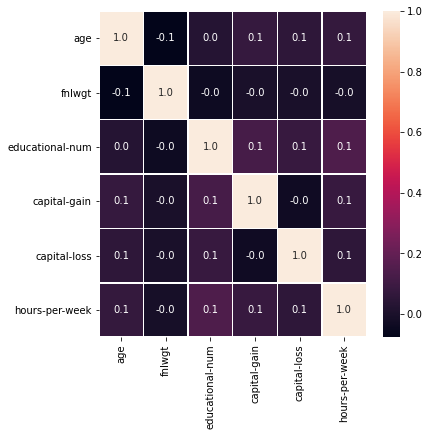

In [17]:
f,ax = plt.subplots(figsize=(6,6))
sns.heatmap(df.corr(), annot=True,linewidth=.5,fmt='.1f',ax=ax)

from the above heatmap we can infer that columns are not correlated much

In [18]:
df.age.unique() # there is no such abnormal thing to work on, the column is clean but check for the outliers

array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87, 86], dtype=int64)

In [19]:
df.age.nunique() # there are 74 differet age groups are taken for analysis in the given dataset

74

In [20]:
bins=[0,10,20,30,40,50,60,70,80,90,100]
df.groupby(pd.cut(df['age'], bins=bins)).size()

# we are counting groupwise age of every 10 years

age
(0, 10]          0
(10, 20]      3623
(20, 30]     12170
(30, 40]     12838
(40, 50]     10403
(50, 60]      6202
(60, 70]      2738
(70, 80]       720
(80, 90]       148
(90, 100]        0
dtype: int64

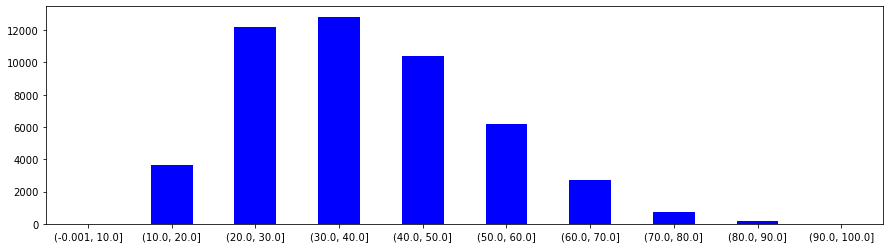

In [21]:
out = pd.cut(df.age, bins=[0,10,20,30,40,50,60,70,80,90,100], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(15,4))
plt.show()

above chart represents count of groupwise age of adults and majority are belongs to between 30-40 age and followed by 20-30 age groups

<AxesSubplot:xlabel='age'>

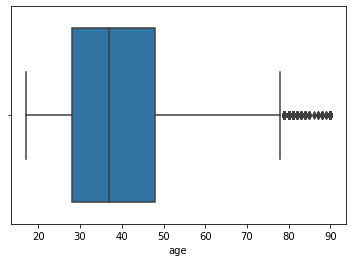

In [22]:
sns.boxplot(data=df, x='age')

<AxesSubplot:xlabel='age', ylabel='count'>

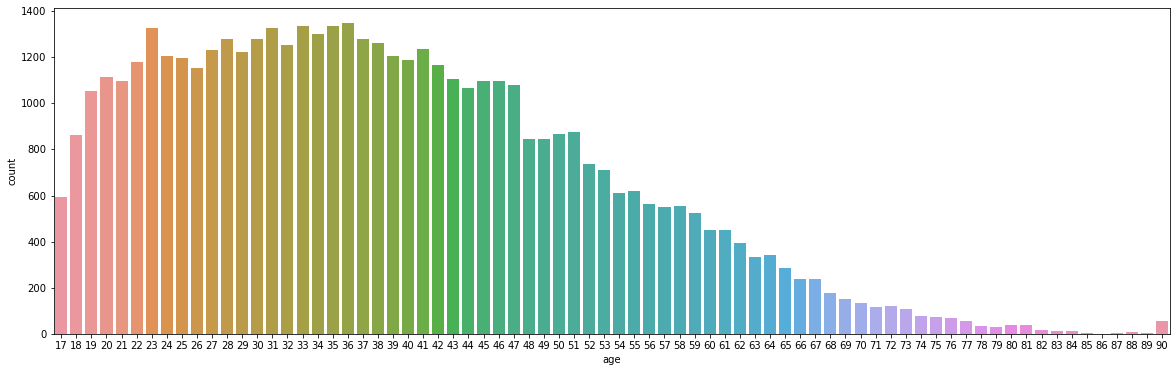

In [23]:
a4_dims = (20,6)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(data = df, x = df.age)

we can simpy describe from here is that major working people age is between 20 and 47

we can also say that these age group people are the major contributors for the economic growth of a country

In [24]:
df.workclass.unique() # here you can find here the NAN values in the workclass column

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [25]:
df.workclass.value_counts() # finding the count of each category in workclass column

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

large group of people are working in private sector compare to other other sectors

In [26]:
df.groupby(by=['workclass','gender']).count() 

age  fnlwgt  education  educational-num  \
workclass        gender                                              
?                Female   1270    1270       1270             1270   
                 Male     1529    1529       1529             1529   
Federal-gov      Female    452     452        452              452   
                 Male      980     980        980              980   
Local-gov        Female   1258    1258       1258             1258   
                 Male     1878    1878       1878             1878   
Never-worked     Female      3       3          3                3   
                 Male        7       7          7                7   
Private          Female  11599   11599      11599            11599   
                 Male    22307   22307      22307            22307   
Self-emp-inc     Female    211     211        211              211   
                 Male     1484    1484       1484             1484   
Self-emp-not-inc Female    629     629        629              629   
                 Male     3233    3233       3233             3233   
State-gov        Female    763     763        763              763   
                 Male     1218    1218       1218             1218   
Without-pay      Female      7       7          7                7   
                 Male       14      14         14               14   

                         marital-status  occupation  relationship   race  \
workclass        gender                                                    
?                Female            1270        1270          1270   1270   
                 Male              1529        1529          1529   1529   
Federal-gov      Female             452         452           452    452   
                 Male               980         980           980    980   
Local-gov        Female            1258        1258          1258   1258   
                 Male              1878        1878          1878   1878   
Never-worked     Female               3           3             3      3   
                 Male                 7           7             7      7   
Private          Female           11599       11599         11599  11599   
                 Male             22307       22307         22307  22307   
Self-emp-inc     Female             211         211           211    211   
                 Male              1484        1484          1484   1484   
Self-emp-not-inc Female             629         629           629    629   
                 Male              3233        3233          3233   3233   
State-gov        Female             763         763           763    763   
                 Male              1218        1218          1218   1218   
Without-pay      Female               7           7             7      7   
                 Male                14          14            14     14   

                         capital-gain  capital-loss  hours-per-week  \
workclass        gender                                               
?                Female          1270          1270            1270   
                 Male            1529          1529            1529   
Federal-gov      Female           452           452             452   
                 Male             980           980             980   
Local-gov        Female          1258          1258            1258   
                 Male            1878          1878            1878   
Never-worked     Female             3             3               3   
                 Male               7             7               7   
Private          Female         11599         11599           11599   
                 Male           22307         22307           22307   
Self-emp-inc     Female           211           211             211   
                 Male            1484          1484            1484   
Self-emp-not-inc Female           629           629             629   
                 Male            3233   

count of male and female w.r.t their workclass, here the private sector had the most adults both males and females are working, in local government male are higher than female

<AxesSubplot:xlabel='fnlwgt'>

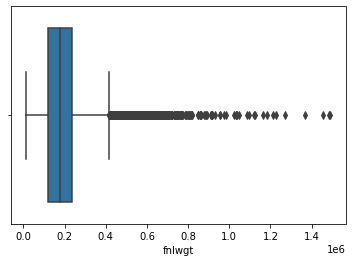

In [27]:
sns.boxplot(data=df, x = 'fnlwgt')

<AxesSubplot:xlabel='fnlwgt', ylabel='Count'>

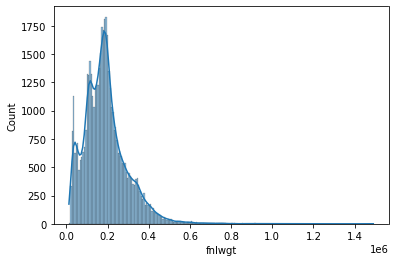

In [28]:
sns.histplot(data=df, x='fnlwgt',kde=True) # here you can find some bumps and the distribution is skewed to one side

In [29]:
df.education.value_counts() # count of each category of education column

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [30]:
df.groupby(by=['education','gender']).count()

age  workclass  fnlwgt  educational-num  \
education    gender                                              
10th         Female    457        457     457              457   
             Male      932        932     932              932   
11th         Female    650        650     650              650   
             Male     1162       1162    1162             1162   
12th         Female    211        211     211              211   
             Male      446        446     446              446   
1st-4th      Female     61         61      61               61   
             Male      186        186     186              186   
5th-6th      Female    127        127     127              127   
             Male      382        382     382              382   
7th-8th      Female    239        239     239              239   
             Male      716        716     716              716   
9th          Female    220        220     220              220   
             Male      536        536     536              536   
Assoc-acdm   Female    627        627     627              627   
             Male      974        974     974              974   
Assoc-voc    Female    734        734     734              734   
             Male     1327       1327    1327             1327   
Bachelors    Female   2477       2477    2477             2477   
             Male     5548       5548    5548             5548   
Doctorate    Female    113        113     113              113   
             Male      481        481     481              481   
HS-grad      Female   5097       5097    5097             5097   
             Male    10687      10687   10687            10687   
Masters      Female    845        845     845              845   
             Male     1812       1812    1812             1812   
Preschool    Female     24         24      24               24   
             Male       59         59      59               59   
Prof-school  Female    132        132     132              132   
             Male      702        702     702              702   
Some-college Female   4178       4178    4178             4178   
             Male     6700       6700    6700             6700   

                     marital-status  occupation  relationship   race  \
education    gender                                                    
10th         Female             457         457           457    457   
             Male               932         932           932    932   
11th         Female             650         650           650    650   
             Male              1162        1162          1162   1162   
12th         Female             211         211           211    211   
             Male               446         446           446    446   
1st-4th      Female              61          61            61     61   
             Male               186         186           186    186   
5th-6th      Female             127         127           127    127   
             Male               382         382           382    382   
7th-8th      Female             239         239           239    239   
             Male               716         716           716    716   
9th          Female             220         220           220    220   
             Male               536         536           536    536   
Assoc-acdm   Female             627         627           627    627   
             Male               974         974           974    974   
Assoc-voc    Female             734         734           734    734   
             Male              1327        1327          1327   1327   
Bachelors    Female            2477        2477          2477   2477   
             Male              5548        5548          5548   5548   
Doctorate    Female             113         113           113    113   
             Male               481         481           481    481   
HS-grad      Female            5097        5097   

in the above cell the grouped data shows the count of gender wise belonging to respective  education background

In [31]:
bins=[0,10,20,30,40,50,60,70,80,90,100]
df.groupby(pd.cut(df['age'], bins=bins)).size()

# we are counting groupwise age of every 10 years

age
(0, 10]          0
(10, 20]      3623
(20, 30]     12170
(30, 40]     12838
(40, 50]     10403
(50, 60]      6202
(60, 70]      2738
(70, 80]       720
(80, 90]       148
(90, 100]        0
dtype: int64

In [32]:
df.groupby(by=['education']).count() 

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
education,,,,,,,,,,,,,,
10th,1389,1389,1389,1389,1389,1389,1389,1389,1389,1389,1389,1389,1389,1389
11th,1812,1812,1812,1812,1812,1812,1812,1812,1812,1812,1812,1812,1812,1812
12th,657,657,657,657,657,657,657,657,657,657,657,657,657,657
1st-4th,247,247,247,247,247,247,247,247,247,247,247,247,247,247
5th-6th,509,509,509,509,509,509,509,509,509,509,509,509,509,509
7th-8th,955,955,955,955,955,955,955,955,955,955,955,955,955,955
9th,756,756,756,756,756,756,756,756,756,756,756,756,756,756
Assoc-acdm,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601
Assoc-voc,2061,2061,2061,2061,2061,2061,2061,2061,2061,2061,2061,2061,2061,2061


form this cell we can find out count of each category of education that adults had pursued

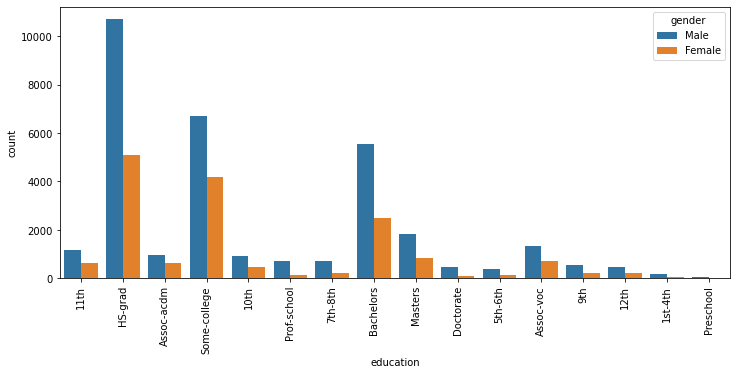

In [33]:
f,ax = plt.subplots(figsize=(12,5))
sns.countplot(data=df, x='education',hue='gender', ax=ax)
plt.xticks(rotation=90);

from the observation of above cell the plots shows that large number of male and female gender had done their high school education and above HS graduation.

In [34]:
df['hours-per-week'].value_counts().head(20) # adults who work for 40 hours per week are large in number followed by 45,50,60

40    22803
50     4246
45     2717
60     2177
35     1937
20     1862
30     1700
55     1051
25      958
48      770
38      714
15      623
70      437
10      425
32      423
65      355
24      354
42      338
36      336
44      310
Name: hours-per-week, dtype: int64

In [39]:
df['native-country'].value_counts() # knowing number of adults per country

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                        

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'educational-num'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>]], dtype=object)

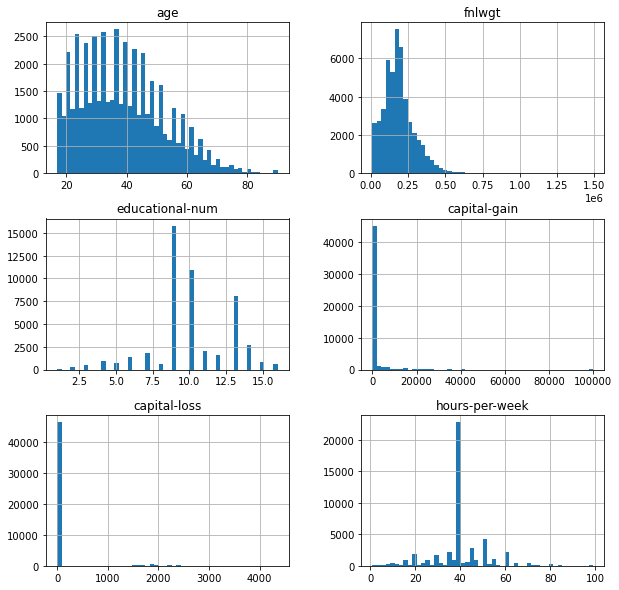

In [40]:
df.hist(bins=50, figsize = (10,10))

In [41]:
df['hours-per-week'].max(),df['hours-per-week'].min(),df['hours-per-week'].mean() # min, max and mean of working hours per week column

(99, 1, 40.422382375824085)

the above cell gives output of max, min and avg of hours per week

<AxesSubplot:xlabel='hours-per-week'>

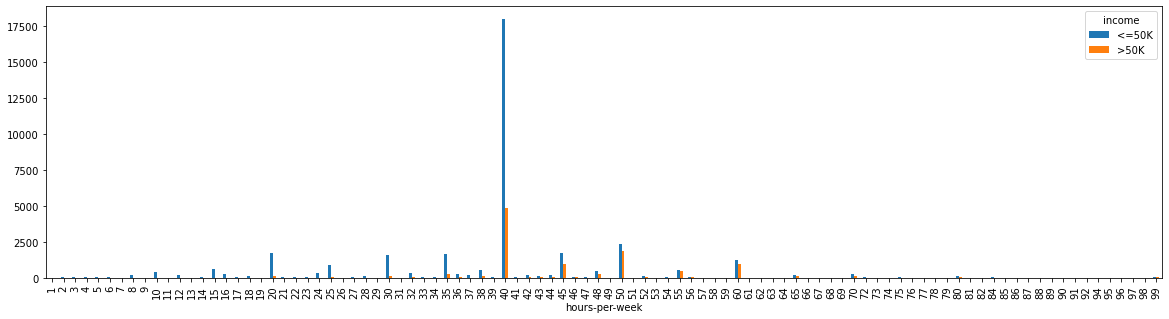

In [42]:
pd.crosstab(df['hours-per-week'], df['income']).plot(kind='bar', figsize=(20,5))

from the above chart large group of adults are working for 40 hours in a week but earning less than 50k and upto 5000 adults are getting above 50k who work for 40 hours per week and there are less people work for below and above than 40 hours in a week.

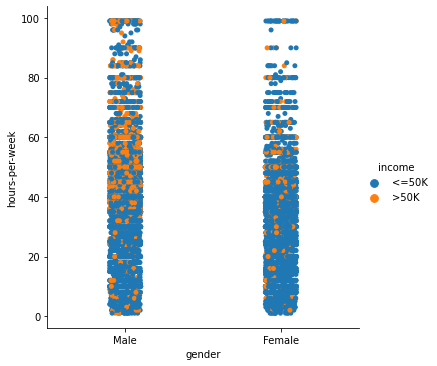

In [43]:
sns.catplot(data=df, x='gender', y='hours-per-week', hue='income')

male count is more at earing above 50k w.r.t working hours per week and females more in count of earning less than 50k

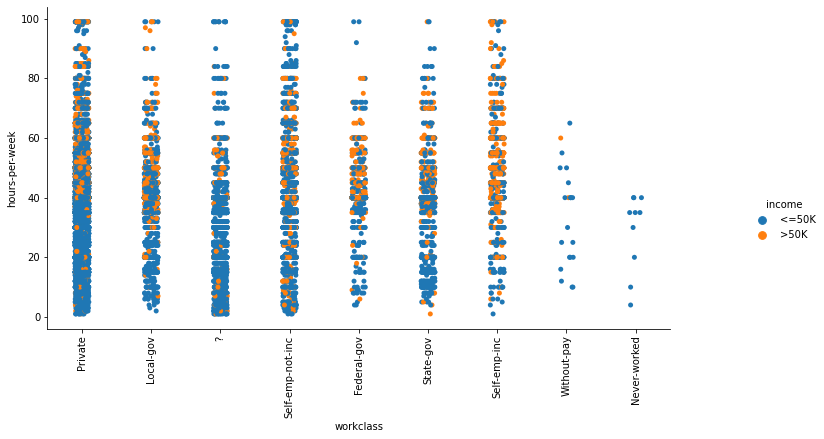

In [46]:
from matplotlib import pyplot

g=sns.catplot(data=df, x='workclass', y='hours-per-week', hue='income')
plt.xticks(rotation=90)
g.fig.set_figheight(5)
g.fig.set_figwidth(12)

the self employed and private working class adults w.r.t their working hours per week are earning above 50k are more in number, compare to other working class, adults earning above 50k are less in number in government sectors but large group of adults earn less than 5ok in gov sectors

In [47]:
df.income.value_counts() # there are only two types of income

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [48]:
df[(df['hours-per-week']<=10) & (df['income'] =='>50K') & (df['gender']=='Female')] # using conditions 

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
89,41,?,38434,Masters,14,Married-civ-spouse,?,Wife,White,Female,7688,0,10,United-States,>50K
92,33,Private,176410,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,5178,0,10,United-States,>50K
505,38,?,48976,HS-grad,9,Married-civ-spouse,?,Wife,White,Female,0,1887,10,United-States,>50K
1340,38,Private,44780,Bachelors,13,Married-civ-spouse,Sales,Wife,White,Female,0,0,8,United-States,>50K
1560,55,?,125659,HS-grad,9,Married-civ-spouse,?,Wife,White,Female,0,0,6,United-States,>50K
1804,49,Private,140782,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,2415,3,United-States,>50K
2099,37,Private,183739,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,8,United-States,>50K
3608,57,Private,222477,Some-college,10,Married-civ-spouse,Prof-specialty,Wife,White,Female,15024,0,8,United-States,>50K
3993,43,Self-emp-not-inc,95246,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,5,United-States,>50K
4331,74,Self-emp-inc,148003,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,6,United-States,>50K


the above cell had an acitvity of adult female gender belongs to United-Stats of white race ie,adults who work less than 10 hours are earning above 50K.

In [49]:
df[df['hours-per-week']==99] # this column gives you that audlts who work for 99 hours a week, there are 137 adults

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
384,29,Private,211208,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,99,United-States,>50K
901,37,Private,112158,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7688,0,99,United-States,>50K
1121,31,Local-gov,378426,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,Columbia,<=50K
1156,48,?,117054,5th-6th,3,Divorced,?,Not-in-family,White,Male,0,0,99,United-States,<=50K
1649,52,Private,254680,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,99,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47273,40,Self-emp-inc,104235,Masters,14,Never-married,Other-service,Own-child,White,Male,0,0,99,United-States,<=50K
47962,43,Private,266324,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1902,99,United-States,>50K
47980,43,Self-emp-not-inc,163108,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,<=50K
48750,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K


<AxesSubplot:xlabel='hours-per-week'>

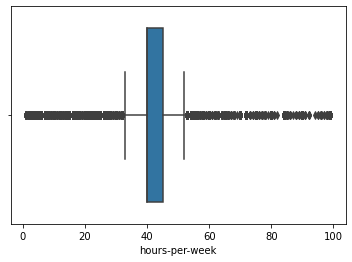

In [50]:
sns.boxplot(data=df, x=df['hours-per-week']) # the average wokring hours per week is around 40 hours 

In [51]:
pd.pivot_table(df, index= ['gender','income','race'], aggfunc={'age':[np.mean,min,max],'educational-num':[np.mean,min,max]})

age                  educational-num  \
                                   max       mean   min             max   
gender income race                                                        
Female <=50K  Amer-Indian-Eskimo  80.0  36.058824  17.0            16.0   
              Asian-Pac-Islander  81.0  35.066964  17.0            15.0   
              Black               90.0  37.615349  17.0            16.0   
              Other               74.0  30.972222  17.0            14.0   
              White               90.0  36.142882  17.0            16.0   
       >50K   Amer-Indian-Eskimo  53.0  38.266667  21.0            16.0   
              Asian-Pac-Islander  72.0  39.492754  25.0            15.0   
              Black               68.0  42.696970  21.0            16.0   
              Other               44.0  34.363636  23.0            15.0   
              White               90.0  42.394942  19.0            16.0   
Male   <=50K  Amer-Indian-Eskimo  82.0  36.175510  17.0            14.0   
              Asian-Pac-Islander  90.0  37.000000  18.0            16.0   
              Black               90.0  36.420484  17.0            16.0   
              Other               77.0  33.849057  17.0            16.0   
              White               90.0  37.388714  17.0            16.0   
       >50K   Amer-Indian-Eskimo  64.0  41.975000  27.0            16.0   
              Asian-Pac-Islander  75.0  42.876471  23.0            16.0   
              Black               90.0  44.647465  20.0            16.0   
              Other               63.0  42.333333  27.0            16.0   
              White               90.0  44.729509  19.0            16.0   

                                                   
                                       mean   min  
gender income race                                 
Female <=50K  Amer-Indian-Eskimo   9.482353   2.0  
              Asian-Pac-Islander  10.325893   1.0  
              Black                9.460478   1.0  
              Other                8.770833   2.0  
              White                9.892468   1.0  
       >50K   Amer-Indian-Eskimo  12.000000   9.0  
              Asian-Pac-Islander  11.608696   3.0  
              Black               11.757576   7.0  
              Other               12.545455  10.0  
              White               11.841764   3.0  
Male   <=50K  Amer-Indian-Eskimo   8.963265   1.0  
              Asian-Pac-Islander  10.578550   1.0  
              Black                9.063819   1.0  
              Other                8.259434   1.0  
              White                9.474784   1.0  
       >50K   Amer-Indian-Eskimo  10.600000   7.0  
              Asian-Pac-Islander  12.579412   3.0  
              Black               10.868664   1.0  
              Other               11.205128   3.0  
              White               11.562714   2.0

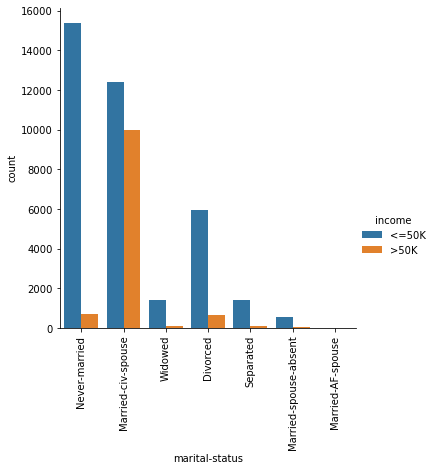

In [52]:
sns.catplot(data=df, x='marital-status',hue='income',kind='count')
plt.xticks(rotation=90);

1.from the above chat we can infer about count of marital-status audlts w.r.t their income that which group earns above 50K and below 50K\
2.large group of never-married adults are earning less than 50K and also very less group of never-married are earning greater than 50k\
3.count of Married adults earning above 50K are more than the other groups

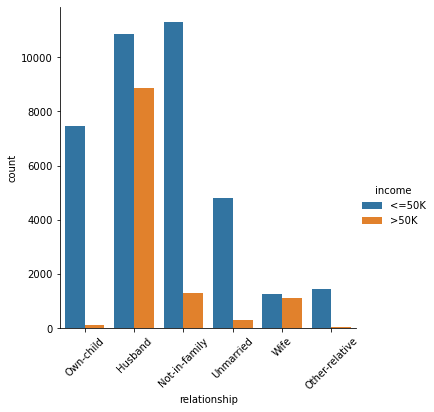

In [53]:
sns.catplot(data=df, x='relationship',hue='income',kind='count')
plt.xticks(rotation=45);

1.from the above chat we can infer about count of relationship of audlts w.r.t their income that which group earns above 50K and below 50K\
2.married male adults are the large group of numbers who are earning above 50k are more in number and also the less than 50K are aslo more in number\
3.adults not in family are in large group of count who earns less than 50k and less in earning above 50k

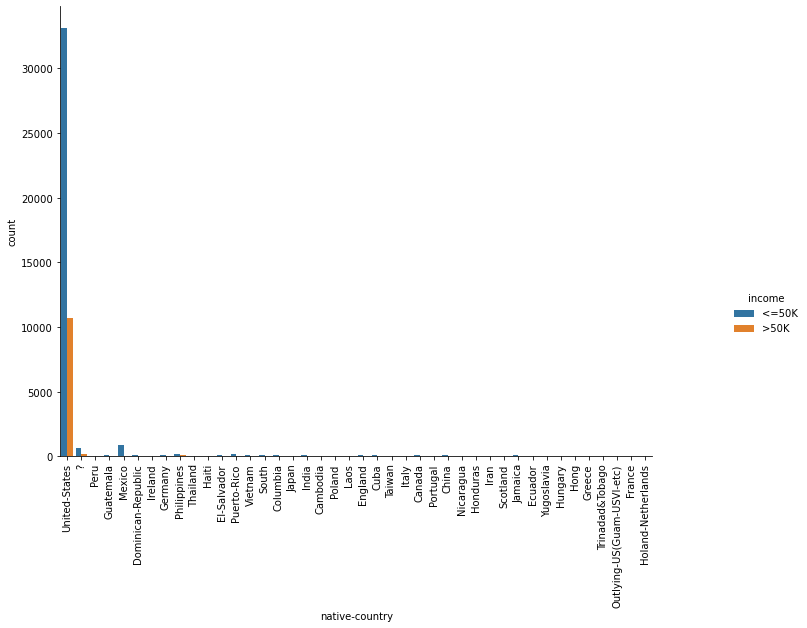

In [57]:
f=sns.catplot(data=df, x='native-country',hue='income',kind='count')
plt.xticks(rotation=90)
f.fig.set_figheight(7)
f.fig.set_figwidth(12)


more number od adults are from US and from us large group of adults earns less than 50K and upto above 11,000 adults are earning greater than 50K and from other countries adults are earning are in less number

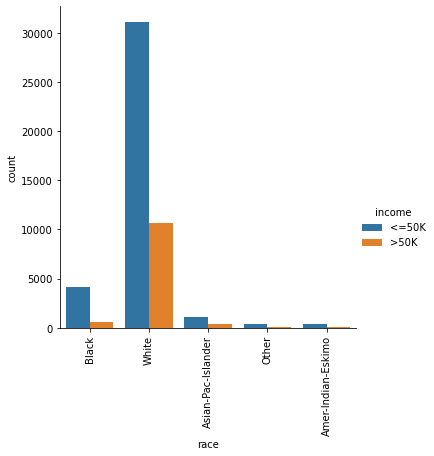

In [59]:
sns.catplot(data=df, x='race',hue='income',kind='count')
plt.xticks(rotation=90);

here we can observe that more than 30,000 adults of white race earns less than 50k and more than 10,000 adults earn 50k but with the black race most of the adults are earning less than 50k, very less adlts earn above 50k

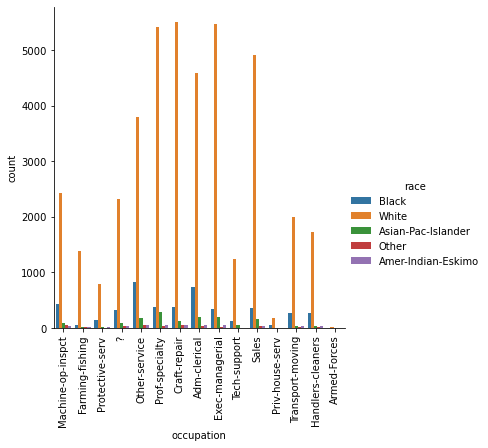

In [60]:
sns.catplot(data=df, x='occupation',hue='race',kind='count')
plt.xticks(rotation=90);

from the above cell we can conclude that in every occupation white people are largely involved and followed by black\
the chart clearly says that there is a large bias in the race and occupation 

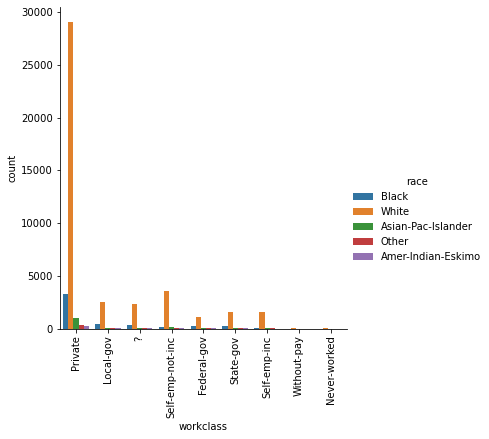

In [61]:
sns.catplot(data=df, x='workclass',hue='race',kind='count')
plt.xticks(rotation=90);

white race adults are more in number in every working class category, it also shows bias in race

In [63]:
df=df.rename(columns={'native-country':'nativecountry'})
df

# just renamed the column name

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,nativecountry,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [64]:
pd.crosstab(df.nativecountry,df.occupation,values=df['educational-num'], aggfunc='mean')

occupation,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
nativecountry,,,,,,,,,,,,,,,
?,10.217391,10.521127,11.000000,8.760870,12.196078,8.700000,8.807692,8.961538,9.034783,9.700000,13.359756,9.571429,10.416667,12.346154,9.820513
Cambodia,9.500000,NaN,NaN,9.333333,13.000000,9.000000,NaN,7.600000,4.000000,NaN,10.500000,NaN,10.750000,NaN,11.000000
Canada,10.263158,9.928571,NaN,9.739130,11.800000,8.333333,8.500000,8.375000,9.000000,NaN,13.268293,9.500000,10.411765,11.000000,8.777778
China,10.666667,11.500000,NaN,5.800000,11.125000,NaN,NaN,9.000000,8.153846,NaN,14.250000,NaN,13.500000,13.250000,9.500000
Columbia,8.000000,11.000000,NaN,8.384615,9.500000,2.000000,7.800000,8.500000,9.090909,7.666667,13.250000,NaN,10.250000,9.666667,7.800000
Cuba,6.400000,10.368421,NaN,9.000000,12.050000,6.000000,9.200000,7.555556,6.529412,5.500000,13.588235,8.000000,9.200000,14.000000,6.100000
Dominican-Republic,8.000000,8.111111,NaN,8.181818,12.750000,NaN,7.142857,5.333333,6.315789,8.000000,11.333333,10.000000,8.100000,NaN,9.000000
Ecuador,10.000000,10.000000,NaN,8.500000,9.750000,NaN,7.500000,8.000000,8.000000,9.000000,11.500000,NaN,11.000000,10.000000,10.666667
El-Salvador,7.500000,9.500000,NaN,7.304348,12.000000,6.000000,4.636364,5.142857,5.500000,4.636364,12.857143,10.000000,9.416667,11.500000,6.500000


1.from the above cell we can infer the country status that how their occupation system is recruting adults w.r.t the adults educational qualification\
2.US had average of educational qualification 9 completed adults in every occupation\
3.In India adults need higher educational qualifications for every occupation and the avg educational qualification num is 10.\
4.But in some countries adults with less educational background also working for higher positions

In [65]:
pd.crosstab(df.occupation, df.income) # count of above 50K and less than or equal to 50K w.r.t occupation

income,<=50K,>50K
occupation,,
?,2544,265
Adm-clerical,4843,768
Armed-Forces,10,5
Craft-repair,4729,1383
Exec-managerial,3178,2908
Farming-fishing,1317,173
Handlers-cleaners,1934,138
Machine-op-inspct,2650,372
Other-service,4719,204


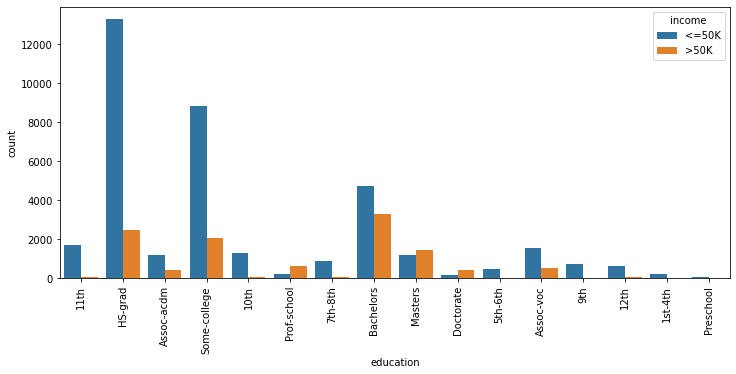

In [66]:
f,ax = plt.subplots(figsize=(12,5))
sns.countplot(data=df, x='education',hue='income', ax=ax)
plt.xticks(rotation=90);

 * from the chart we can conclude that on an average atleast adults had completed their HS-grad and large group of adults earn <=50K and less people earn >50K
 * but less adults had completed their Bachelors, but also count of adults earning greater than 50K are more in number that adults who had completed their Bachelors

In [67]:
df['nativecountry'].value_counts() # count of adults countrywise

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                        

In [68]:
df.groupby(by=['gender','education']).count() # count of male and femle w.r.t their education

age  workclass  fnlwgt  educational-num  \
gender education                                                 
Female 10th            457        457     457              457   
       11th            650        650     650              650   
       12th            211        211     211              211   
       1st-4th          61         61      61               61   
       5th-6th         127        127     127              127   
       7th-8th         239        239     239              239   
       9th             220        220     220              220   
       Assoc-acdm      627        627     627              627   
       Assoc-voc       734        734     734              734   
       Bachelors      2477       2477    2477             2477   
       Doctorate       113        113     113              113   
       HS-grad        5097       5097    5097             5097   
       Masters         845        845     845              845   
       Preschool        24         24      24               24   
       Prof-school     132        132     132              132   
       Some-college   4178       4178    4178             4178   
Male   10th            932        932     932              932   
       11th           1162       1162    1162             1162   
       12th            446        446     446              446   
       1st-4th         186        186     186              186   
       5th-6th         382        382     382              382   
       7th-8th         716        716     716              716   
       9th             536        536     536              536   
       Assoc-acdm      974        974     974              974   
       Assoc-voc      1327       1327    1327             1327   
       Bachelors      5548       5548    5548             5548   
       Doctorate       481        481     481              481   
       HS-grad       10687      10687   10687            10687   
       Masters        1812       1812    1812             1812   
       Preschool        59         59      59               59   
       Prof-school     702        702     702              702   
       Some-college   6700       6700    6700             6700   

                     marital-status  occupation  relationship   race  \
gender education                                                       
Female 10th                     457         457           457    457   
       11th                     650         650           650    650   
       12th                     211         211           211    211   
       1st-4th                   61          61            61     61   
       5th-6th                  127         127           127    127   
       7th-8th                  239         239           239    239   
       9th                      220         220           220    220   
       Assoc-acdm               627         627           627    627   
       Assoc-voc                734         734           734    734   
       Bachelors               2477        2477          2477   2477   
       Doctorate                113         113           113    113   
       HS-grad                 5097        5097          5097   5097   
       Masters                  845         845           845    845   
       Preschool                 24          24            24     24   
       Prof-school              132         132           132    132   
       Some-college            4178        4178          4178   4178   
Male   10th                     932         932           932    932   
       11th                    1162        1162          1162   1162   
       12th                     446         446           446    446   
       1st-4th                  186         186           186    186   
       5th-6th                  382         382           382    382   
       7th-8th                  716         716           716    716   
       9th                      536         536   

male and female gender adults had pursued bachelors in large groups and also HS-grad is completed most of the adults

In [69]:
df.groupby(by=['gender','marital-status']).count()

age  workclass  fnlwgt  education  \
gender marital-status                                               
Female Divorced                4001       4001    4001       4001   
       Married-AF-spouse         25         25      25         25   
       Married-civ-spouse      2480       2480    2480       2480   
       Married-spouse-absent    304        304     304        304   
       Never-married           7218       7218    7218       7218   
       Separated                931        931     931        931   
       Widowed                 1233       1233    1233       1233   
Male   Divorced                2632       2632    2632       2632   
       Married-AF-spouse         12         12      12         12   
       Married-civ-spouse     19899      19899   19899      19899   
       Married-spouse-absent    324        324     324        324   
       Never-married           8899       8899    8899       8899   
       Separated                599        599     599        599   
       Widowed                  285        285     285        285   

                              educational-num  occupation  relationship  \
gender marital-status                                                     
Female Divorced                          4001        4001          4001   
       Married-AF-spouse                   25          25            25   
       Married-civ-spouse                2480        2480          2480   
       Married-spouse-absent              304         304           304   
       Never-married                     7218        7218          7218   
       Separated                          931         931           931   
       Widowed                           1233        1233          1233   
Male   Divorced                          2632        2632          2632   
       Married-AF-spouse                   12          12            12   
       Married-civ-spouse               19899       19899         19899   
       Married-spouse-absent              324         324           324   
       Never-married                     8899        8899          8899   
       Separated                          599         599           599   
       Widowed                            285         285           285   

                               race  capital-gain  capital-loss  \
gender marital-status                                             
Female Divorced                4001          4001          4001   
       Married-AF-spouse         25            25            25   
       Married-civ-spouse      2480          2480          2480   
       Married-spouse-absent    304           304           304   
       Never-married           7218          7218          7218   
       Separated                931           931           931   
       Widowed                 1233          1233          1233   
Male   Divorced                2632          2632          2632   
       Married-AF-spouse         12            12            12   
       Married-civ-spouse     19899         19899         19899   
       Married-spouse-absent    324           324           324   
       Never-married           8899          8899          8899   
       Separated                599           599           599   
       Widowed                  285           285           285   

                              hours-per-week  nativecountry  income  
gender marital-status                                                
Female Divorced                         4001           4001    4001  
       Married-AF-spouse                  25             25      25  
       Married-civ-spouse               2480           2480    2480  
       Married-spouse-absent             304            304     304  
       Never-married                    7218           7218    7218  
       Separated                         931            931     931  
       Widowed                          1233           1233    1233  
Male   Divorced        

1.in male adults married are in large numbers and in female adults divorced adults are high compare to male adults\
2.Never married adults are in high in both the gender\
3.Widowed adults are of 1233 

<AxesSubplot:>

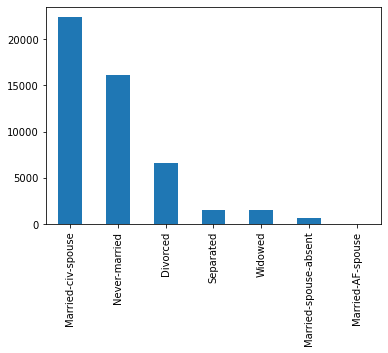

In [70]:
df['marital-status'].value_counts().plot(kind='bar')

married adults count is more and there are approximately upto 10k adults who were separated, widowed, divorced

In [71]:
df[(df['marital-status']=='Widowed') & (df.income=='>50K')] # shows widowed adults whose income is above 50K

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,nativecountry,income
747,41,State-gov,186990,Prof-school,15,Widowed,Prof-specialty,Not-in-family,Other,Female,0,0,52,United-States,>50K
1067,64,Private,240357,HS-grad,9,Widowed,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,>50K
1182,59,Private,157749,Bachelors,13,Widowed,Exec-managerial,Unmarried,White,Male,0,3004,40,United-States,>50K
1240,41,Private,135056,Masters,14,Widowed,Prof-specialty,Not-in-family,White,Female,10520,0,38,United-States,>50K
2038,48,Private,148995,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Male,14084,0,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47861,55,Self-emp-not-inc,308746,Prof-school,15,Widowed,Prof-specialty,Not-in-family,White,Male,0,0,55,United-States,>50K
48057,64,Private,60940,HS-grad,9,Widowed,Sales,Not-in-family,White,Female,8614,0,50,France,>50K
48365,48,Private,105808,9th,5,Widowed,Transport-moving,Unmarried,White,Male,0,0,40,United-States,>50K
48528,44,Federal-gov,38434,Bachelors,13,Widowed,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,>50K


In [72]:
df.groupby(by=['gender','nativecountry']).count() # count of male and female w.r.t their country

age  workclass  fnlwgt  education  educational-num  \
gender nativecountry                                                           
Female ?                  248        248     248        248              248   
       Cambodia             6          6       6          6                6   
       Canada              63         63      63         63               63   
       China               33         33      33         33               33   
       Columbia            32         32      32         32               32   
...                       ...        ...     ...        ...              ...   
Male   Thailand            16         16      16         16               16   
       Trinadad&Tobago     13         13      13         13               13   
       United-States    29223      29223   29223      29223            29223   
       Vietnam             56         56      56         56               56   
       Yugoslavia          18         18      18         18               18   

                        marital-status  occupation  relationship   race  \
gender nativecountry                                                      
Female ?                           248         248           248    248   
       Cambodia                      6           6             6      6   
       Canada                       63          63            63     63   
       China                        33          33            33     33   
       Columbia                     32          32            32     32   
...                                ...         ...           ...    ...   
Male   Thailand                     16          16            16     16   
       Trinadad&Tobago              13          13            13     13   
       United-States             29223       29223         29223  29223   
       Vietnam                      56          56            56     56   
       Yugoslavia                   18          18            18     18   

                        capital-gain  capital-loss  hours-per-week  income  
gender nativecountry                                                        
Female ?                         248           248             248     248  
       Cambodia                    6             6               6       6  
       Canada                     63            63              63      63  
       China                      33            33              33      33  
       Columbia                   32            32              32      32  
...                              ...           ...             ...     ...  
Male   Thailand                   16            16              16      16  
       Trinadad&Tobago            13            13              13      13  
       United-States           29223         29223           29223   29223  
       Vietnam                    56            56              56      56  
       Yugoslavia                 18            18              18      18  

[83 rows x 13 columns]

In [73]:
df.income.value_counts()/len(df)*100

<=50K    76.071823
>50K     23.928177
Name: income, dtype: float64

here in this data 76 percent of less than 50K adults are present and above 50k there are 23.9 percent of adults

## Treating Outliers and Missing values

**first we check for how data is distributed**

In [74]:
df.fnlwgt.mean(), df.fnlwgt.median(), df.fnlwgt.std() # mean, median, standard deviation of fnlwgt column

(189664.13459727284, 178144.5, 105604.02542315713)

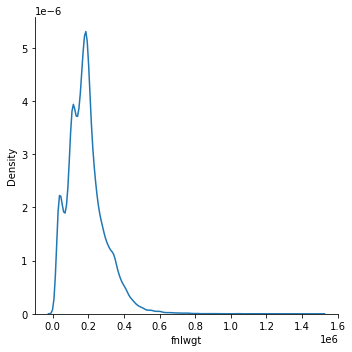

In [75]:
sns.displot(data=df, x='fnlwgt',kind='kde') # distribution looks like some what normally distributed but we can also find log normal

In [76]:
df['capital-gain'].mean(),df['capital-gain'].median(),df['capital-gain'].std() 

(1079.0676262233324, 0.0, 7452.019057653448)

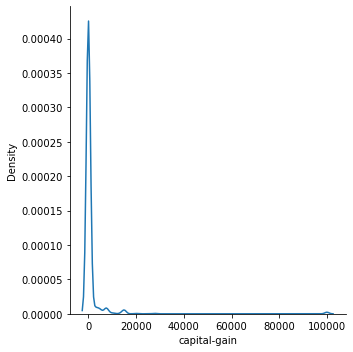

In [77]:
sns.displot(data=df, x='capital-gain',kind='kde') # for this data is skewed to one side

In [78]:
df['capital-loss'].mean(),df['capital-loss'].median(),df['capital-loss'].std()

(87.50231358257237, 0.0, 403.0045521244552)

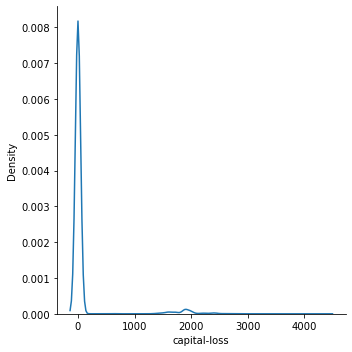

In [79]:
sns.displot(data=df, x='capital-loss',kind='kde') # for this data is skewed to one side

In [80]:
df['age'].mean(),df['age'].median(),df['age'].std(),

(38.64358543876172, 37.0, 13.71050993444322)

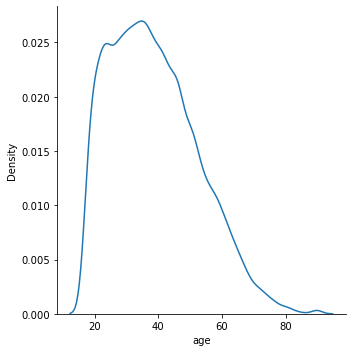

In [81]:
sns.displot(data=df, x='age',kind='kde')

<AxesSubplot:xlabel='age'>

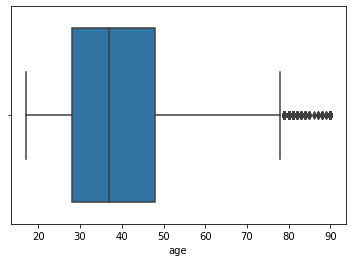

In [84]:
sns.boxplot(data=df, x='age')

In [83]:
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(df['age'])

Outliers: [79, 80, 90, 79, 80, 81, 82, 83, 81, 85, 80, 90, 81, 84, 81, 89, 81, 83, 81, 82, 80, 90, 81, 83, 80, 90, 90, 84, 80, 80, 80, 81, 90, 85, 90, 81, 81, 80, 80, 79, 81, 80, 88, 87, 90, 79, 83, 79, 80, 90, 79, 79, 81, 81, 90, 82, 90, 87, 81, 88, 80, 81, 80, 81, 90, 88, 89, 84, 80, 80, 83, 79, 81, 79, 90, 80, 81, 90, 88, 90, 90, 80, 90, 81, 82, 79, 81, 80, 83, 90, 90, 79, 81, 90, 90, 80, 90, 90, 79, 79, 84, 90, 80, 90, 81, 83, 84, 81, 79, 85, 82, 79, 80, 90, 90, 90, 84, 80, 90, 90, 79, 84, 90, 79, 90, 90, 90, 82, 81, 90, 84, 79, 81, 82, 81, 80, 90, 80, 84, 82, 79, 90, 84, 90, 83, 79, 81, 80, 79, 80, 79, 80, 90, 90, 80, 90, 90, 81, 83, 82, 90, 90, 81, 80, 80, 90, 79, 80, 82, 85, 80, 79, 90, 81, 79, 80, 79, 81, 82, 88, 90, 82, 88, 84, 83, 79, 86, 90, 90, 82, 83, 81, 79, 90, 80, 81, 79, 84, 84, 79, 90, 80, 81, 81, 81, 90, 87, 90, 80, 80, 82, 90, 90, 85, 82, 81]


In [85]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


here we can observe that in capital-gain and hours-per-week had some large values which varies the data distribution are considered as outliers

### replacing outlier values with mean 

In [86]:
np.mean(df['hours-per-week']) # mean value if hours per week

40.422382375824085

In [87]:
df['hours-per-week'].replace(99,np.mean(df['hours-per-week'].values),inplace=True)

In [88]:
df['capital-gain'].replace(99999,np.mean(df['capital-gain'].values),inplace=True)

In [89]:
df.describe() # here you can observe the change of outliers in above both columns are replaced with mean values

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,584.893278,87.502314,40.258074
std,13.710510,1.056040e+05,2.570973,2530.549506,403.004552,11.995662
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,41310.000000,4356.000000,98.000000


### Removing the outliers

In [90]:
df = pd.read_csv('adult.csv',na_values='?')
df
# defining the null values

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [91]:
df=df.dropna()
df
# removing all the missing values

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [92]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## ML model building

In [93]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [94]:
df.iloc[:,:-1] # feature columns

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [95]:
df.iloc[:,-1] # target columns

0        <=50K
1        <=50K
2         >50K
3         >50K
5        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 45222, dtype: object

### Encoding the data

In [96]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [97]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

### Label Encoder

In [99]:
le = LabelEncoder()
encode_cols=['workclass','education','marital-status','occupation','relationship','race','gender','native-country']
for x in encode_cols:
    df[x] = le.fit_transform(df[x])

### One Hot Encoding

In [100]:
enc = OneHotEncoder(handle_unknown='ignore')
df['income']=enc.fit_transform(df[['income']]).toarray()

In [101]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,1.0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,1.0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,0.0
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38,0.0
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,1.0
48838,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,0.0
48839,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,1.0
48840,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,1.0


In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold

In [103]:
X,Y= df[['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']],df[['income']]

In [105]:
X_train, X_test,y_train, y_test=train_test_split(X,Y,test_size=.3,random_state=5)

In [106]:
models = {
    "                Support Vector Machine": SVC(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier(),
    "                            KNeighbors": KNeighborsClassifier(),
    "                     BaggingClassifier": BaggingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                Support Vector Machine trained.
                         Decision Tree trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                            KNeighbors trained.
                     BaggingClassifier trained.


In [107]:
model = GradientBoostingClassifier() # try out and change with different Classifiers, feature_importances will get changed
model.fit(X_train,y_train)

model.feature_importances_ # gives out the values of columns based on how important to the target variable

array([6.03482215e-02, 5.40642732e-03, 2.95063683e-03, 1.09550818e-04,
       2.03012929e-01, 2.16878011e-02, 2.07540941e-02, 3.57085224e-01,
       4.15471617e-04, 3.78201654e-03, 2.25991969e-01, 6.14451734e-02,
       3.60299699e-02, 9.80514294e-04])

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  int64  
 2   fnlwgt           45222 non-null  int64  
 3   education        45222 non-null  int64  
 4   educational-num  45222 non-null  int64  
 5   marital-status   45222 non-null  int64  
 6   occupation       45222 non-null  int64  
 7   relationship     45222 non-null  int64  
 8   race             45222 non-null  int64  
 9   gender           45222 non-null  int64  
 10  capital-gain     45222 non-null  int64  
 11  capital-loss     45222 non-null  int64  
 12  hours-per-week   45222 non-null  int64  
 13  native-country   45222 non-null  int64  
 14  income           45222 non-null  float64
dtypes: float64(1), int64(14)
memory usage: 5.5 MB


In [109]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.06035
Feature: 1, Score: 0.00541
Feature: 2, Score: 0.00295
Feature: 3, Score: 0.00011
Feature: 4, Score: 0.20301
Feature: 5, Score: 0.02169
Feature: 6, Score: 0.02075
Feature: 7, Score: 0.35709
Feature: 8, Score: 0.00042
Feature: 9, Score: 0.00378
Feature: 10, Score: 0.22599
Feature: 11, Score: 0.06145
Feature: 12, Score: 0.03603
Feature: 13, Score: 0.00098


### Feature importance

Text(0.5, 0, 'Feature Importance Score')

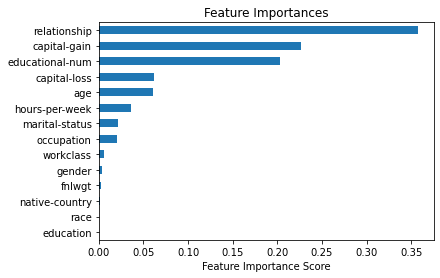

In [110]:
feature_imp = pd.Series(model.feature_importances_, df.columns[:-1]).sort_values()
feature_imp.plot(kind='barh', title='Feature Importances')
plt.xlabel('Feature Importance Score')

 Relationship, educational-num, capital-gain are the important contributors for income

In [111]:
for name, model in models.items():
    print(name + " R^2: {:.5f}".format(model.score(X_test, y_test)))

                Support Vector Machine R^2: 0.78919
                         Decision Tree R^2: 0.80688
                         Random Forest R^2: 0.85339
                     Gradient Boosting R^2: 0.86054
                            KNeighbors R^2: 0.76716
                     BaggingClassifier R^2: 0.83637


### checking the best model score

In [112]:
best_model = GradientBoostingClassifier() 
best_model.fit(X_train, y_train)

print("Model R^2 (Before Optimization): {:.5f}".format(best_model.score(X_test, y_test)))

Model R^2 (Before Optimization): 0.86077


### checking for the best parameters

In [113]:
params = { 'learning_rate': [0.01, 0.1, 1.0],
           'n_estimators': [100, 120 ,150, 200, 250],
           'max_depth': [3, 4, 5] }

clf = GridSearchCV(best_model, params)
clf.fit(X_train, y_train)

clf.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 250}

#### using bagging classifier

In [775]:
bagg = {'n_estimators': [100, 200, 250]}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
BAGclf = BaggingClassifier()
bagg_search = GridSearchCV(estimator=BAGclf, param_grid=bagg, n_jobs=-1, cv=cv, 
                              scoring='accuracy', error_score=0)
bagg_result = bagg_search.fit(X_train, y_train)

In [776]:
print(bagg_result.best_score_)
print(bagg_result.best_params_)

0.8476701942821039
{'n_estimators': 200}


In [792]:
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, min_samples_split=500, min_samples_leaf=50, 
                                   max_depth=8, max_features='log2', subsample=0.8, random_state=42, criterion='mse')

model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='mse', max_depth=8, max_features='log2',
                           min_samples_leaf=50, min_samples_split=500,
                           n_estimators=200, random_state=42, subsample=0.8)

In [782]:
testscore = model.score(X_test, y_test)
print(f"The model test set accuracy is: {(testscore*100):.1f}%.")

The model test set accuracy is: 87.0%.


In [834]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [835]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [836]:
scaler = StandardScaler()
features_standardized = scaler.fit_transform(X)

In [837]:
X_train = scaler.fit_transform(X_train)

In [838]:
model = logistic_regression.fit(X_train, y_train)

In [839]:
y_pred = model.predict( scaler.transform(X_test) )

In [868]:
y_pred.reshape(-1,1)[:40]

array([[1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [870]:
y_test[:40]

,income
16931,1.0
30431,1.0
1070,1.0
22355,1.0
14996,1.0
6347,1.0
3813,1.0
47621,1.0
18943,1.0
44926,0.0


In [821]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
X_train = scaler.fit_transform(X_train)
model = logistic_regression.fit(X_train, y_train)
y_pred = model.predict( scaler.transform(X_test) )

confusion_matrix(y_test,y_pred)

array([[1284, 1526],
       [ 498, 7998]], dtype=int64)

In [755]:
predicted = model.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.78      0.65      0.71      3341
         1.0       0.89      0.94      0.92     10226

    accuracy                           0.87     13567
   macro avg       0.84      0.80      0.81     13567
weighted avg       0.87      0.87      0.87     13567



In [720]:
model = SVC(C=1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [723]:
confusion_matrix(y_test, y_pred)

array([[  431,  2910],
       [   19, 10207]], dtype=int64)

In [725]:
accuracy_score(y_test, y_pred)

0.7841084985626888

In [728]:
precision_score(y_test, y_pred)

0.7781504917282915

In [729]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.13      0.23      3341
         1.0       0.78      1.00      0.87     10226

    accuracy                           0.78     13567
   macro avg       0.87      0.56      0.55     13567
weighted avg       0.82      0.78      0.72     13567



In [876]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [877]:
y_pred = classifier.predict(X_test)

In [878]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.53      0.30      0.38      3341
         1.0       0.80      0.91      0.85     10226

    accuracy                           0.76     13567
   macro avg       0.66      0.61      0.62     13567
weighted avg       0.73      0.76      0.74     13567



In [882]:
y_pred.reshape(-1,1)[:40]

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [884]:
y_test[:40]

,income
26895,1.0
2071,0.0
21459,1.0
22159,1.0
29076,1.0
17219,1.0
30706,1.0
23751,1.0
30250,1.0
15998,1.0
